# Imports

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Generate data

Generate a small toy dataset from 3 multivariate Gaussians. Plot the data.

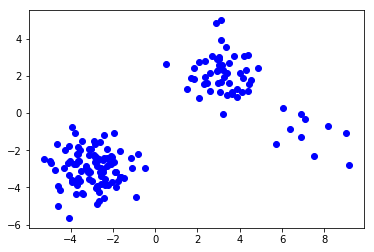

In [2]:
X = np.vstack((np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], 100),
               np.random.multivariate_normal([3, 2], [[1, 0], [0, 1]], 50),
               np.random.multivariate_normal([8, -1], [[1, 0], [0, 1]], 10)))

plt.figure()
plt.plot(X[:, 0], X[:, 1], 'o', color='blue')

We can clearly see the three clusters in the data. Let's call them: cluster 1, 2, and 3 for respectively the cluster with 100, 50, and 10 instances.

# Detect outliers

## iForest

In [4]:
from anomatools.anomaly_detection import iForest

In [5]:
# construct detector and find outliers
detector = iForest()
y_score, y_pred = detector.fit_predict(X, None)

/usr/local/var/pyenv/versions/3.5.2/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Let's plot the results: red = anomaly, blue = normal

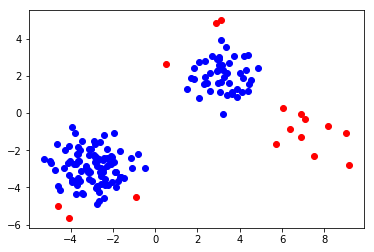

In [6]:
plt.figure()
for l in [-1, 1]:
    ix = np.where(y_pred == l)[0]
    c = 'red' if l == 1 else 'blue'
    plt.plot(X[ix, 0], X[ix, 1], 'o', color=c)

## iNNe

In [7]:
from anomatools.anomaly_detection import iNNe

In [12]:
# construct detector and find outliers
detector = iNNe(t=200, n=12)
y_score, y_pred = detector.fit_predict(X, None)

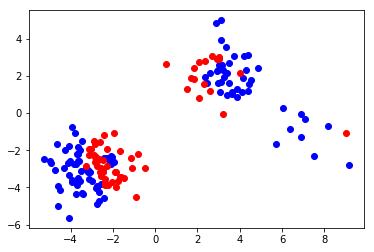

In [13]:
plt.figure()
for l in [-1, 1]:
    ix = np.where(y_pred == l)[0]
    c = 'red' if l == 1 else 'blue'
    plt.plot(X[ix, 0], X[ix, 1], 'o', color=c)

## kNNo

In [14]:
from anomatools.anomaly_detection import kNNo

In [15]:
# construct detector and find outliers
detector = kNNo(k=10)
y_score, y_pred = detector.fit_predict(X, None)

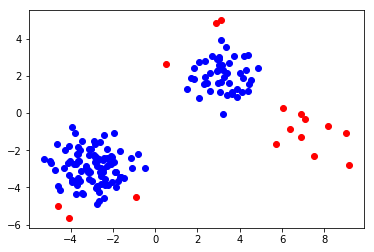

In [16]:
plt.figure()
for l in [-1, 1]:
    ix = np.where(y_pred == l)[0]
    c = 'red' if l == 1 else 'blue'
    plt.plot(X[ix, 0], X[ix, 1], 'o', color=c)